# Regression Project

Gabi Capone

21 October 2023


The dependent variable for this project is the 2019 percentage of national legislators who are female.

Three independnt variables used for this project are the 2019 Human Development Index (a measure of average human achievements from 0-1), 2019 Teen Birth Rate (rate of births per 1,000 women ages 15 - 19), and Gini Index (a measure of income distribution from 0-100). 

Data for this project comes from the World Bank and UN Devleopment Program and is sourced from Michael Minn (https://michaelminn.net/tutorials/data/2022-world-data.geojson). 

I am curious to see the associations between measures of national development and rate of female legislators.

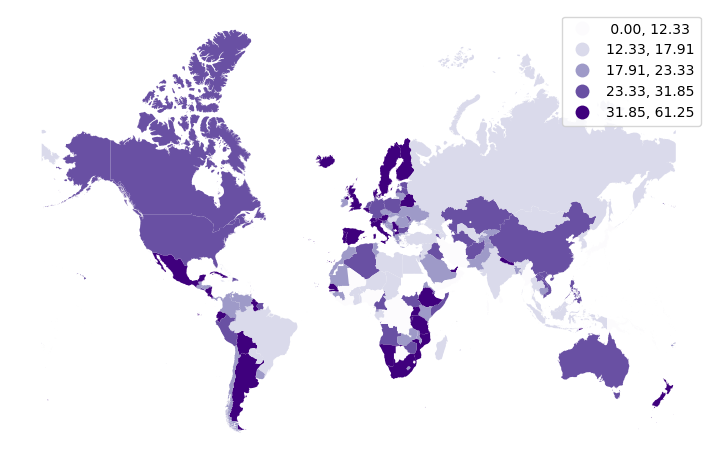

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   ISO3                          235 non-null    object  
 1   Name                          235 non-null    object  
 2   Official Name                 193 non-null    object  
 3   UN Country Code               193 non-null    float64 
 4   Population MM                 213 non-null    float64 
 5   GDP B Dollars                 203 non-null    float64 
 6   GNI B PPP                     189 non-null    float64 
 7   GDP per Capita                187 non-null    float64 
 8   Gini Index                    98 non-null     float64 
 9   Primary Energy Quads          77 non-null     float64 
 10  MM BTU per Capita             134 non-null    float64 
 11  Teen Birth Rate               192 non-null    float64 
 12  Percent Female Legislators    191 non-null

In [1]:
import numpy

import geopandas

import matplotlib.pyplot as plt

countries = geopandas.read_file("https://michaelminn.net/tutorials/data/2022-world-data.geojson")

countries = countries.to_crs("EPSG:3857")

plt.rcParams['figure.figsize'] = [9, 6]


axis = countries.plot("Percent Female Legislators", cmap = "Purples", legend=True, scheme="quantiles")

axis.set_axis_off()

plt.show() 


print(countries.info())

As the histogram is  skewed to the right, it seems that there are more countries that have lower percentages of female legislators compared to the number of countries with higher percentage of female legislators. 

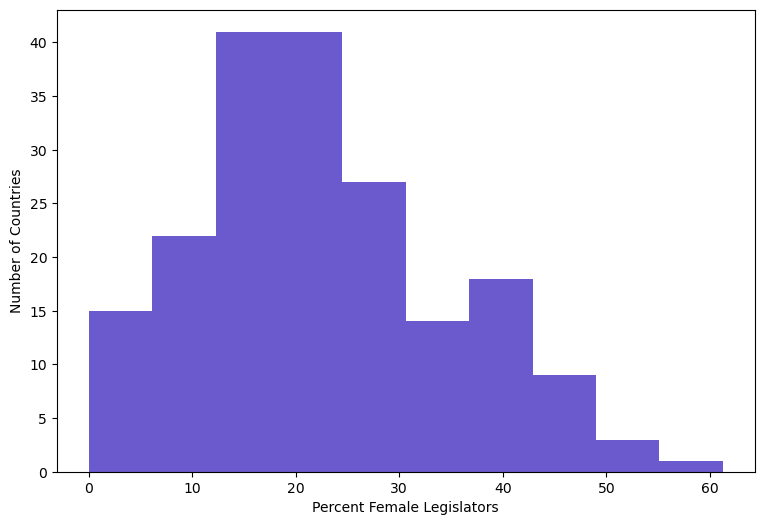

In [2]:
axis = plt.hist(countries["Percent Female Legislators"], color = "slateblue")
plt.xlabel("Percent Female Legislators") 

plt.ylabel("Number of Countries")

plt.show()

The minimum percentage of female legislators is 0, the median is 20.667, and the maximum is 61.25.

In [3]:
print(countries["Percent Female Legislators"].describe())

count    191.000000
mean      22.515785
std       12.260010
min        0.000000
25%       14.058317
50%       20.666667
75%       30.000000
max       61.250000
Name: Percent Female Legislators, dtype: float64


In 2019, Rwanda had the highest percentage of female legislators which can be attributed to the country's presidential initiatives to include more women in leadership, such as reserving 30 percent of parliamentary for women mandated by their constitution. 


In [4]:
data = countries[["Name", "Percent Female Legislators"]]

data = data.dropna()

data = data.sort_values("Percent Female Legislators", ascending=False)

data = data.reset_index(drop=True)

print(data.head())


                   Name  Percent Female Legislators
0                Rwanda                   61.250000
1                  Cuba                   53.223140
2               Bolivia                   53.076923
3  United Arab Emirates                   50.000000
4                Mexico                   48.200000


In 2019, the Micronesia had the lowest percentage of female legislators due to the country's culture around gender and male-dominated society. 

In [5]:
print(data.tail())

                 Name  Percent Female Legislators
186              Oman                    2.325581
187             Yemen                    0.332226
188  Papua New Guinea                    0.000000
189           Vanuatu                    0.000000
190        Micronesia                    0.000000


The variable Prosperity Index has the strongest correlation with Percentage of Female Legislators, however, with an R^2 value of 0.115 there is no significant positive correlation. 

Prosperity Index deals with quality of life factors and usually countries with higher qualities of life have greater gender equality. 

The second graph demonstrates insignificant correlation between Percentage of Female Legislators and GNI B PPP (gross national income in purchasing  power parity), with a R^2 value of 0.001 demonstrating no correlation.

In [6]:
data = countries.select_dtypes(include=numpy.number)

r_squared = data.corr()["Percent Female Legislators"]**2

r_squared = r_squared.sort_values(ascending=False).round(3)

print(r_squared)

Percent Female Legislators      1.000
Prosperity Index                0.115
Happiness Index                 0.098
Corruption Perceptions Index    0.094
Human Development Index         0.067
Infant Mortality                0.062
GDP per Capita                  0.053
Happy Planet Index              0.050
Colonial Transformation         0.041
STC Health Index                0.034
Economic Freedom Index          0.023
Colonial Years                  0.019
Teen Birth Rate                 0.015
Gini Index                      0.012
Primary Energy Quads            0.007
Freedom Score                   0.007
MM BTU per Capita               0.002
GDP B Dollars                   0.001
GNI B PPP                       0.001
Population MM                   0.001
UN Country Code                 0.000
Colonial End                    0.000
Name: Percent Female Legislators, dtype: float64


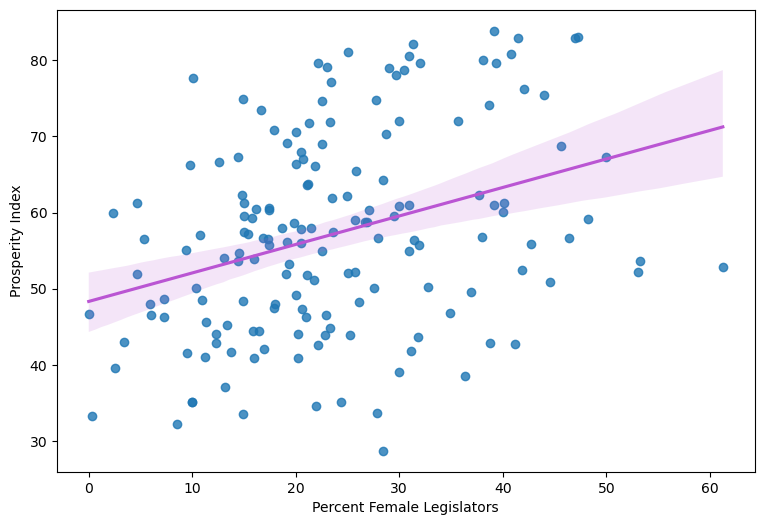

In [7]:
import seaborn

import numpy

data = countries[["Percent Female Legislators", "Prosperity Index"]]

seaborn.regplot(x = "Percent Female Legislators", y = "Prosperity Index", 
	data=countries, line_kws={"color": "mediumorchid"})

plt.show()

<Axes: xlabel='Percent Female Legislators', ylabel='GNI B PPP'>

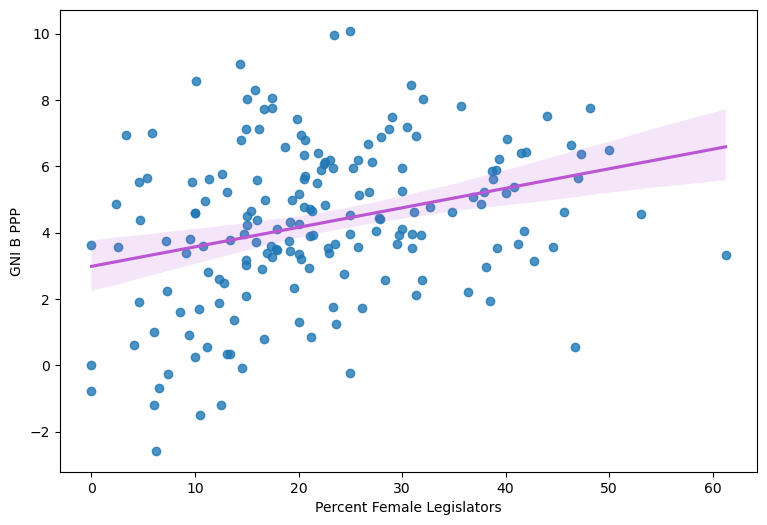

In [8]:
import seaborn

import numpy

data = countries[["Percent Female Legislators", "GNI B PPP"]]

data = data.dropna()

data["GNI B PPP"] = numpy.log(data["GNI B PPP"])

seaborn.regplot(x = "Percent Female Legislators", y = "GNI B PPP",
                data= data, line_kws={"color": "mediumorchid"})

In [9]:
import pysal.lib

import pysal.model

dependent_name = ["Percent Female Legislators"]

independent_names = ["Human Development Index", "Teen Birth Rate", 
        "Gini Index"]

model_data = countries[dependent_name + independent_names + ["geometry", "Name"]]

model_data = model_data.dropna()

,Percent Female Legislators,Human Development Index,Teen Birth Rate,Gini Index
count,96.000000,96.000000,96.000000,96.000000
mean,25.888620,0.772031,38.926383,36.832292
std,11.444596,0.135719,35.093207,7.518909
min,3.380282,0.433000,1.261800,24.600000
25%,17.755273,0.703750,8.149100,31.375000
50%,23.459362,0.795500,26.780500,35.700000
75%,31.462963,0.887250,60.886300,41.900000
max,61.250000,0.955000,145.390000,56.300000


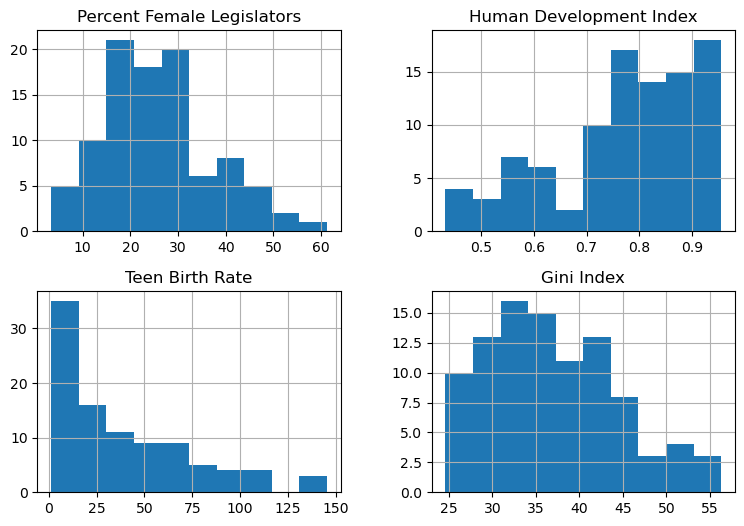

In [10]:
model_data.hist()

model_data.describe()

,Percent Female Legislators,Human Development Index,Teen Birth Rate,Gini Index
count,96.000000,96.000000,96.000000,96.000000
mean,25.888620,0.569099,3.230374,3.614006
std,11.444596,0.079082,1.037000,0.196284
min,3.380282,0.359770,0.816161,3.242592
25%,17.755273,0.532832,2.213474,3.477386
50%,23.459362,0.585283,3.324106,3.602777
75%,31.462963,0.635121,4.125207,3.758872
max,61.250000,0.670390,4.986274,4.048301


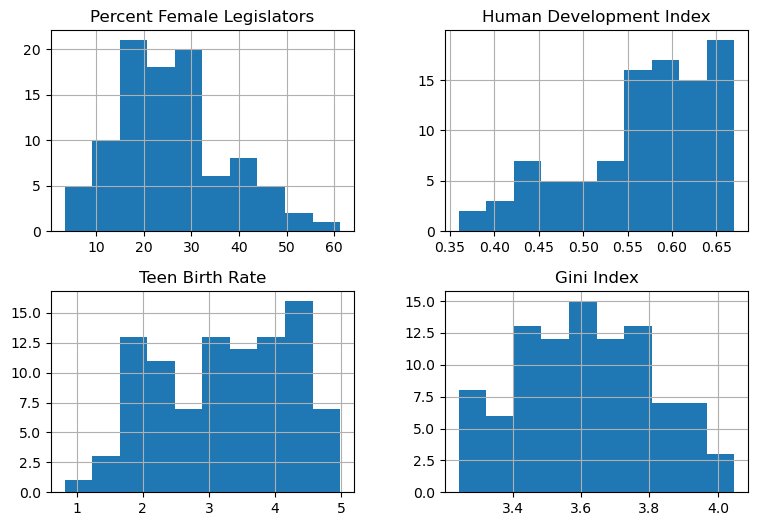

In [11]:
transform_vars = ["Human Development Index", "Teen Birth Rate", "Gini Index"]

model_data[transform_vars] = numpy.log(model_data[transform_vars] + 1)

model_data.hist()

model_data.describe()

array([[<Axes: title={'center': 'Percent Female Legislators'}>,
        <Axes: title={'center': 'Human Development Index'}>],
       [<Axes: title={'center': 'Teen Birth Rate'}>,
        <Axes: title={'center': 'Gini Index'}>]], dtype=object)

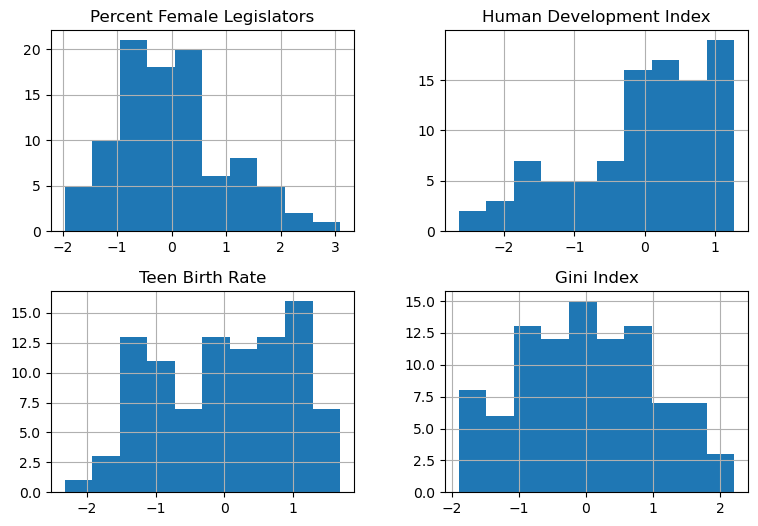

In [12]:
var_names = dependent_name + independent_names

model_data[var_names] = (model_data[var_names] - model_data[var_names].mean()) / model_data[var_names].std()

model_data.hist()

The adjusted R-squared value is 0.0443, meaning 4.43% of variance in percentage of female legislators can be explained by a combination of the variables used in this model.

Teen Birth Rate is  the most significant contributors to the model, with a coefficient of -0.2258. 

HDI and GINI make the least significant contributions to the model, as their coefficients are 0.0808 and 0.108 respectively. 

I know this model is unaffected from multicollinearity because all of the VIF values are below 5.

In [13]:
import pysal.lib

import pysal.model


ols_model = pysal.model.spreg.OLS(model_data[dependent_name].values,
        model_data[independent_names].values,
        name_y = dependent_name, name_x = independent_names)

print(ols_model.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :['Percent Female Legislators']                Number of Observations:          96
Mean dependent var  :     -0.0000                Number of Variables   :           4
S.D. dependent var  :      1.0000                Degrees of Freedom    :          92
R-squared           :      0.0745
Adjusted R-squared  :      0.0443
Sum squared residual:      87.922                F-statistic           :      2.4686
Sigma-square        :       0.956                Prob(F-statistic)     :     0.06693
S.E. of regression  :       0.978                Log likelihood        :    -131.999
Sigma-square ML     :       0.916                Akaike info criterion :     271.998
S.E of regression ML:      0.9570                Schwarz criterion     :     282.256

-----------------------------------------------------------

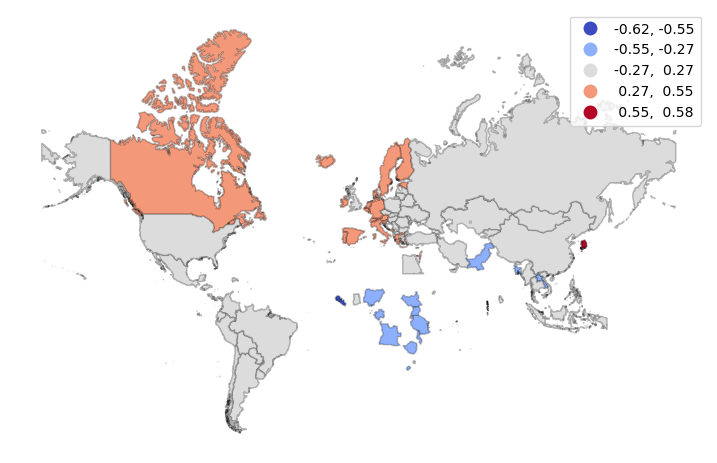

In [14]:
residuals = model_data

residuals["Residuals"] = ols_model.predy

axis = residuals.plot("Residuals", legend=True,
        cmap = "coolwarm", edgecolor = "#00000040",
        scheme="stdmean")

axis.set_axis_off()

plt.show()

In [15]:
pysal.model.spreg.vif(ols_model)


[None,
 (2.3190010213128445, 0.4312201636866356),
 (3.073762159577689, 0.3253342152332932),
 (1.694061248297032, 0.5902974293315886)]

"Spatial regression models involve techniques that compensate for spatial autocorrelation so the model coefficients and outputs are more trustworthy" (https://michaelminn.net/tutorials/python-regression/#post-hoc-fallacy).


Spatial error regression proved to be the best model as it had the lowest AIC value of 261.843 compared to 271.998 (OLS) and 264.417 (spatial lag). 

/cvmfs/cybergis.illinois.edu/software/conda/cybergisx/python3-0.9.4/lib/python3.8/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


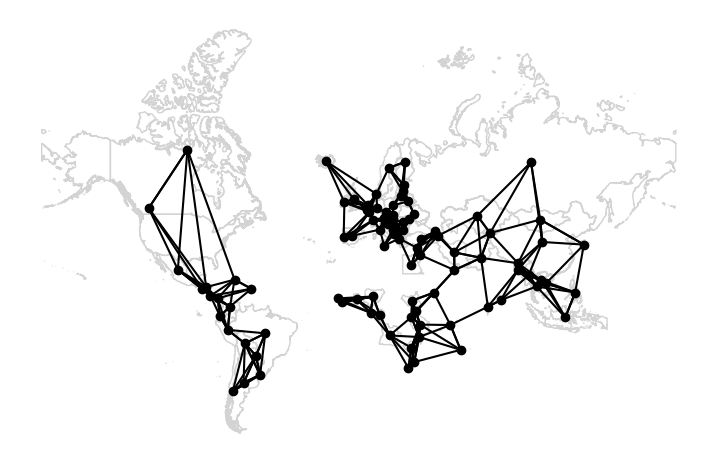

In [16]:
import pysal.lib

weights = pysal.lib.weights.KNN.from_dataframe(model_data, k=4)

axis = model_data.plot(edgecolor="lightgray", facecolor="none")

model_data["index"] = model_data.index

weights.plot(gdf=model_data, indexed_on="index", ax=axis)

axis.set_axis_off()

plt.show()

In [17]:
lag_model = pysal.model.spreg.ML_Lag(model_data[dependent_name].values,
        model_data[independent_names].values, weights)

print(lag_model.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:          96
Mean dependent var  :     -0.0000                Number of Variables   :           5
S.D. dependent var  :      1.0000                Degrees of Freedom    :          91
Pseudo R-squared    :      0.1955
Spatial Pseudo R-squared:  0.0731
Sigma-square ML     :       0.803                Log likelihood        :    -127.208
S.E of regression   :       0.896                Akaike info criterion :     264.417
                                                 Schwarz criterion     :     277.238

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------

/cvmfs/cybergis.illinois.edu/software/conda/cybergisx/python3-0.9.4/lib/python3.8/site-packages/scipy/optimize/_minimize.py:892: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
/cvmfs/cybergis.illinois.edu/software/conda/cybergisx/python3-0.9.4/lib/python3.8/site-packages/spreg/ml_lag.py:608: RuntimeWarning: invalid value encountered in log
  jacob = np.log(np.linalg.det(a))


In [18]:
err_model = pysal.model.spreg.ML_Error(model_data[dependent_name].values,
        model_data[independent_names].values, weights)

print(err_model.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL ERROR (METHOD = FULL)
-------------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:          96
Mean dependent var  :     -0.0000                Number of Variables   :           4
S.D. dependent var  :      1.0000                Degrees of Freedom    :          92
Pseudo R-squared    :      0.0538
Sigma-square ML     :       0.791                Log likelihood        :    -126.921
S.E of regression   :       0.889                Akaike info criterion :     261.843
                                                 Schwarz criterion     :     272.100

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------------------------------------

/cvmfs/cybergis.illinois.edu/software/conda/cybergisx/python3-0.9.4/lib/python3.8/site-packages/scipy/optimize/_minimize.py:892: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
/cvmfs/cybergis.illinois.edu/software/conda/cybergisx/python3-0.9.4/lib/python3.8/site-packages/spreg/ml_error.py:509: RuntimeWarning: invalid value encountered in log
  jacob = np.log(np.linalg.det(a))
